# Project 8 - Decision trees and neural networks

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, precision_recall_fscore_support, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import networkx as nx
import colorsys
import math

## Decision Trees

### Read in data

In [2]:
df = pd.read_csv('glass.csv')
display(df.head(5))

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Clean data

In [3]:
threshold = 0.8
corrs = df.corr()
for row in corrs.columns:
    temp = corrs.index[(abs(corrs[row])<1) & (abs(corrs[row])>=threshold)]
    if temp.any():
        print(temp)

Index(['Ca'], dtype='object')
Index(['RI'], dtype='object')


Since Calcium and the Refractive Index are highly correlated, we'll eliminate the Refractive Index

In [4]:
colsToDelete = ['RI']
df = df.drop(labels = colsToDelete , axis =1 )

### Standardize data
Since we're using a decision tree, scale of each column doesn't matter! Theres' no need to standardize.

In [5]:
X = df.drop(columns = ['Type'])
Y = df.Type

# for col in X.columns:
#     X[col] = (X[col] - X[col].mean()) / X[col].std()
    
display(X.head(5))

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

### What would be some good trees to look at?

Best Depth: 4
Worst Depth: 15


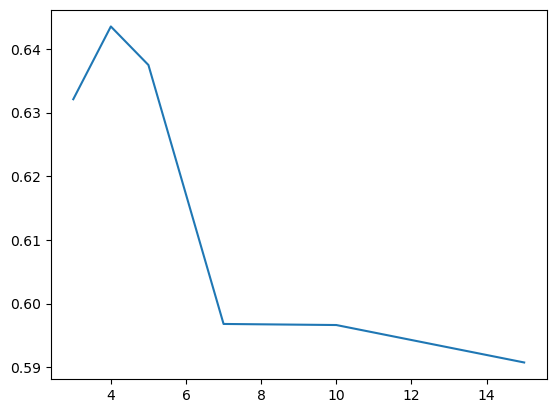

In [76]:
depths = [3,4,5,7,10,15]
dtscores = []
for depth in depths:
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt = dt.fit(X_train,y_train)
    dtscores.append(sum(cross_val_score(dt,X_train,y_train,cv=5)/5))
    
plt.plot(depths,dtscores)
bestDepth = depths[np.argmax(dtscores)]
worstDepth = depths[np.argmin(dtscores)]
print('Best Depth:', bestDepth)
print('Worst Depth:',worstDepth)

### Visualize Tree \#1, Max depth =  4

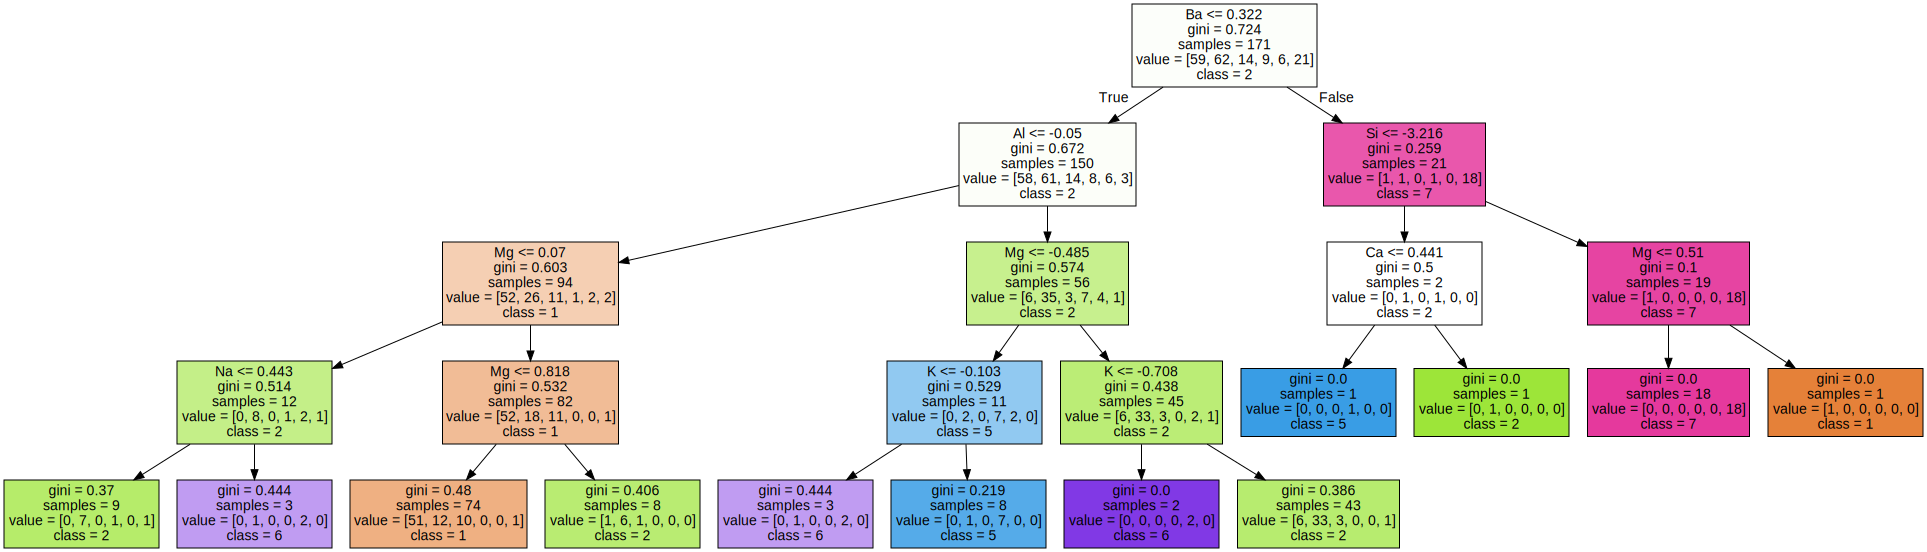

[[10  1  0  0  0  0]
 [ 4 10  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  1  3  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.83      0.71      0.77        14
           3       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4
           6       0.50      1.00      0.67         3
           7       1.00      1.00      1.00         8

    accuracy                           0.74        43
   macro avg       0.66      0.65      0.60        43
weighted avg       0.75      0.74      0.71        43

0.7441860465116279


C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
dtBest = tree.DecisionTreeClassifier(max_depth = bestDepth)
dtBest = dtBest.fit(X_train,y_train)

feature_cols = X.columns
classNames=['1','2','3','5','6','7']

# Uncomment this to make the first file
# with open("glassTreeBest.dot", 'w') as f:
#     f = export_graphviz(dtBest, out_file=f, feature_names=feature_cols, class_names= classNames, filled = True)
graph = Source(tree.export_graphviz(dtBest, out_file=None,
                                    feature_names=feature_cols,
                                    class_names= classNames, filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

predictions = dtBest.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(dtBest.score(X_test,y_test))

### Visualize Tree \#2, Max depth =  15

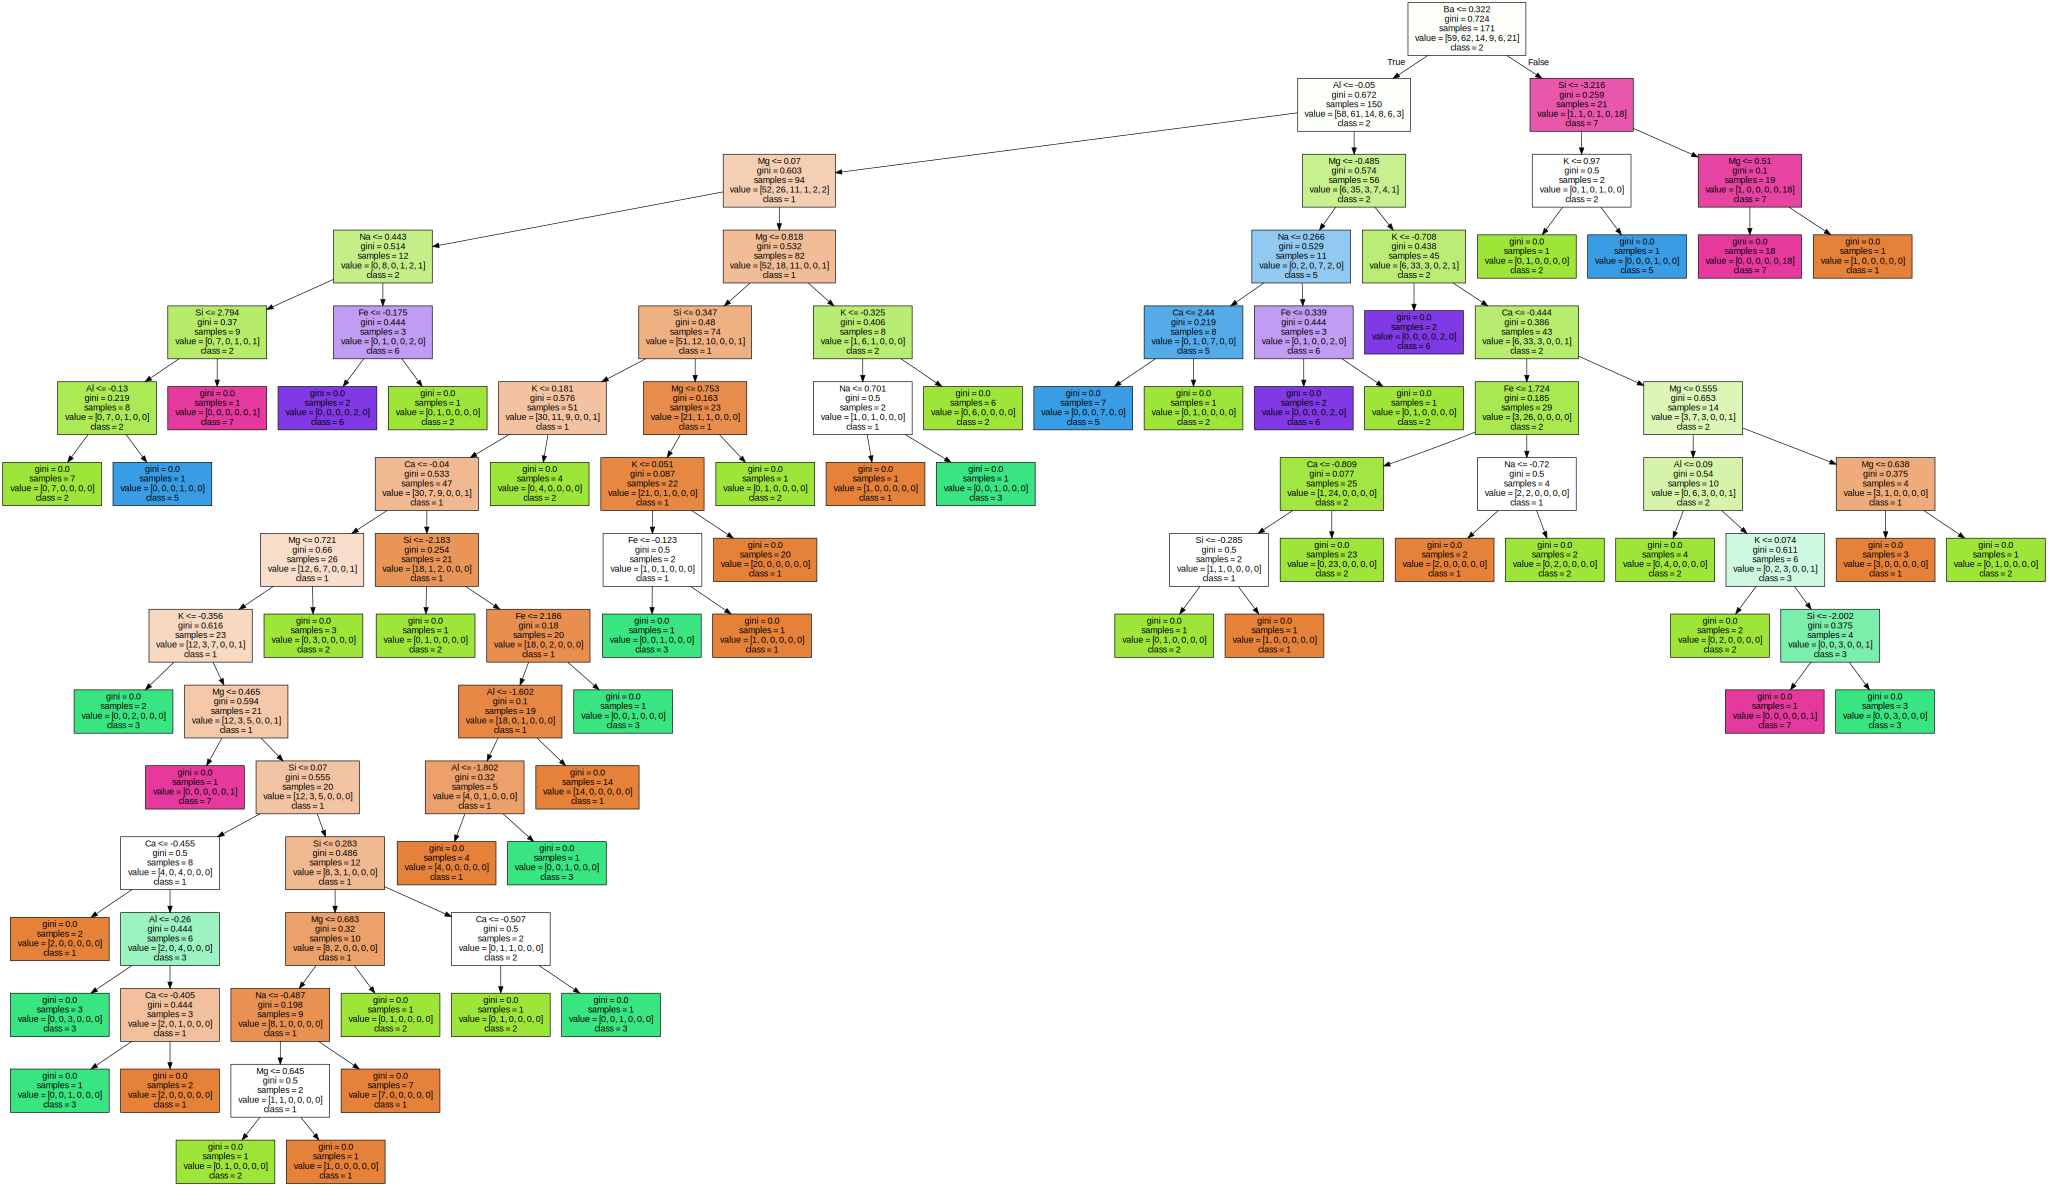

[[8 2 1 0 0 0]
 [4 8 2 0 0 0]
 [1 0 2 0 0 0]
 [0 0 0 4 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 8]]
              precision    recall  f1-score   support

           1       0.62      0.73      0.67        11
           2       0.80      0.57      0.67        14
           3       0.40      0.67      0.50         3
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.80      0.83      0.81        43
weighted avg       0.79      0.77      0.77        43

0.7674418604651163


In [88]:
dtWorst = tree.DecisionTreeClassifier(max_depth = worstDepth)
dtWorst = dtWorst.fit(X_train,y_train)

feature_cols = X.columns
classNames=['1','2','3','5','6','7']

# Uncomment this to make the first file
# with open("glassTreeWorst.dot", 'w') as f:
#     f = export_graphviz(dtBest, out_file=f, feature_names=feature_cols, class_names= classNames, filled = True)
graph = Source(tree.export_graphviz(dtWorst, out_file=None,
                                    feature_names=feature_cols,
                                    class_names= classNames, filled = True))
svg = SVG(graph.pipe(format='svg'))
display(svg)

predictions = dtWorst.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(dtWorst.score(X_test,y_test))

### Depth's effect on bias and variance (maybe use a ROC or other graph)

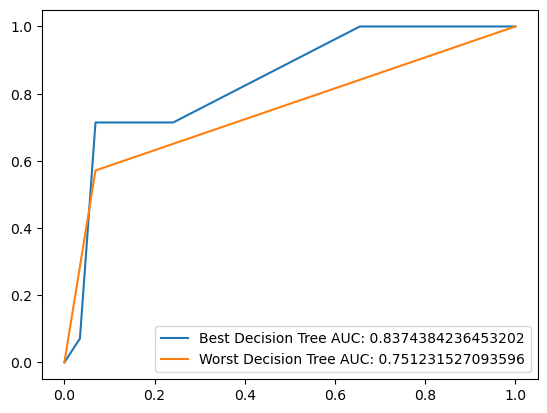

In [89]:
dtBestY_prob = dtBest.predict_proba(X_test)
trueLabel = (y_test == 2)
fpr, tpr,thresh = roc_curve(trueLabel,dtBestY_prob[:,1])
dtBest_auc = auc(fpr,tpr)
plt.plot(fpr,tpr)

dtWorstY_prob = dtWorst.predict_proba(X_test)
trueLabel = (y_test == 2)
fpr, tpr,thresh = roc_curve(trueLabel,dtWorstY_prob[:,1])
dtWorst_auc = auc(fpr,tpr)
plt.plot(fpr,tpr)

plt.legend(['Best Decision Tree AUC: '+str(dtBest_auc),'Worst Decision Tree AUC: '+str(dtWorst_auc)])
plt.show()

So the both decision trees did really well with prediciting Type 2 glass, building windows non-float processed

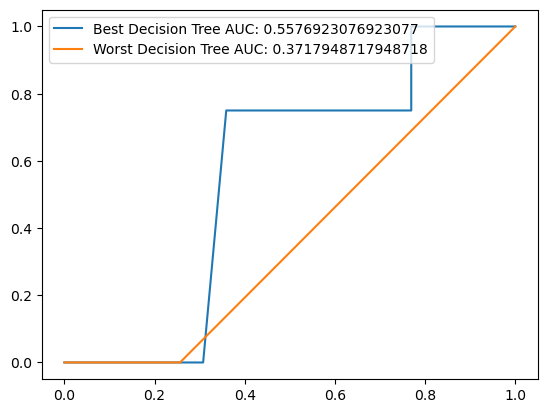

In [90]:
dtBestY_prob = dtBest.predict_proba(X_test)
trueLabel = (y_test == 5)
fpr, tpr,thresh = roc_curve(trueLabel,dtBestY_prob[:,1])
dtBest_auc = auc(fpr,tpr)
plt.plot(fpr,tpr)

dtWorstY_prob = dtWorst.predict_proba(X_test)
trueLabel = (y_test == 5)
fpr, tpr,thresh = roc_curve(trueLabel,dtWorstY_prob[:,1])
dtWorst_auc = auc(fpr,tpr)
plt.plot(fpr,tpr)

plt.legend(['Best Decision Tree AUC: '+str(dtBest_auc),'Worst Decision Tree AUC: '+str(dtWorst_auc)])
plt.show()

But both did poorly in prediciting Type 5 glass, containers.

Either way, the decision tree with 4 layers performed better. This is becasue with 15 layers, each ending leaf only had a few samples in it. Thus there was a lot of bias in the model. With only 4 layers, there was more variance in the tree, meaning that some leaves had multiple classes in them. But the tradeoff is that we could then categorize more generally.

### The choices the algorithm makes in which attriubutes to split on

It's no accident that the first layer of splits were made on the Barium feature, and the second layer was made on Aluminum and Silicon. These were the most efficient splits. According to https://digitalfire.com/oxide/bao#:~:text=%2DBarium%20imparts%20properties%20to%20glazes,and%20therefore%20does%20not%20discolor "Barium imparts properties to glazes that fall between calcia/magnesia and lead". So it appears that the presence of Barium highly sugguests that it has unique properties that fits the needs of tableware well. Glass is mostly Silicon, which is why the 15 layer decision tree used it as an attribute to split on 8 different times. So depending on where in the tree it lies, an attribute can both predict a sample well, as well as be too discerning for general use.

## Neural Networks

### Code for displaying a neural net

In [12]:
def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        for k in range(hidden_neurons_n[-1]):
            w = mlp.coefs_[prev_layer][k][i]
            G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    

In [24]:
X = df.drop(columns = ['Type'])
Y = df.Type

for col in X.columns:
    X[col] = (X[col] - X[col].mean()) / X[col].std()
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

### Build Neural Net \#1, Hidden Layers = 1, Num of Nodes = 16

In [25]:
mlp1 = MLPClassifier(hidden_layer_sizes=(16),max_iter=1000)
mlp1.fit(X_train,y_train)

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=16, max_iter=1000)

### Performance Evaluation of Neural Net #1

In [26]:
# Code goes here
predictions1 = mlp1.predict(X_test)
print(confusion_matrix(y_test,predictions1))
print(classification_report(y_test,predictions1))

[[11  0  0  0  0  0]
 [ 4  9  0  1  0  0]
 [ 1  2  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.69      0.64      0.67        14
           3       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.77        43
   macro avg       0.67      0.69      0.68        43
weighted avg       0.72      0.77      0.73        43



C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualize Neural Net \#1

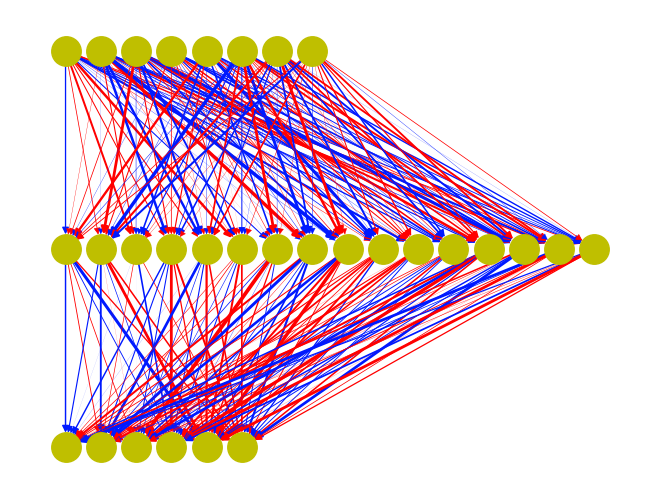

In [27]:
show_ann(mlp1)


In [28]:
weights1 = np.absolute(mlp1.coefs_[0])
weights1 = np.sum(weights1,axis=1)/16
weights1

array([0.40491186, 0.48998802, 0.49166576, 0.29506713, 0.3856208 ,
       0.5339989 , 0.47019891, 0.32906886])

### Build Neural Net \#2, Hidden Layers = 2, Num of Nodes = [24,16]

In [29]:
mlp2 = MLPClassifier(hidden_layer_sizes=(24, 16),max_iter=1000)
mlp2.fit(X_train,y_train)

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(24, 16), max_iter=1000)

### Performance Evaluation of Neural Net #2

In [30]:
predictions2 = mlp2.predict(X_test)
print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))

[[ 8  1  2  0  0  0]
 [ 2 10  0  1  0  1]
 [ 0  1  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.80      0.73      0.76        11
           2       0.77      0.71      0.74        14
           3       0.50      0.67      0.57         3
           5       0.60      0.75      0.67         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.77        43
   macro avg       0.76      0.75      0.75        43
weighted avg       0.78      0.77      0.77        43



### Visualize Neural Net \#2

array([0.38531645, 0.3866996 , 0.43827256, 0.41570799, 0.43696678,
       0.51883018, 0.32535945, 0.38408168])

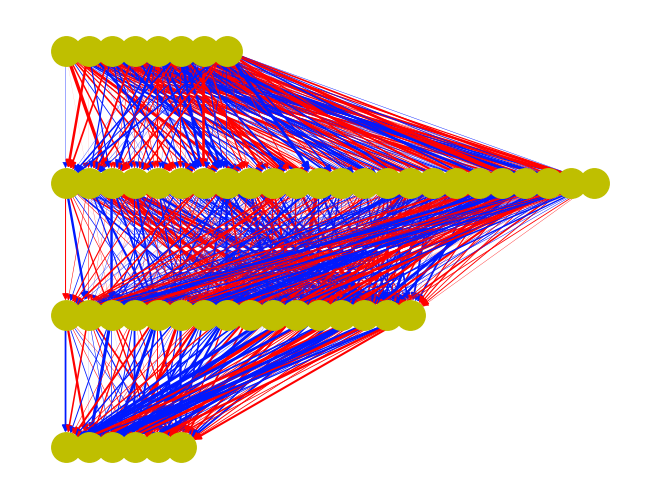

In [31]:
show_ann(mlp2)
weights2 = np.absolute(mlp2.coefs_[0])
weights2 = np.sum(weights2,axis=1)/24
weights2

### Build Neural Net \#3, Hidden Layers = 3, Num of Nodes =  [16,32,16]

In [34]:
mlp3 = MLPClassifier(hidden_layer_sizes=(16,32,16),max_iter=1000)
mlp3.fit(X_train,y_train)

C:\Users\Jacob\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 32, 16), max_iter=1000)

### Performance Evaluation of Neural Net #3

In [35]:
predictions3 = mlp3.predict(X_test)
print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))

[[ 7  1  2  0  0  1]
 [ 3 11  0  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  1  2  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.70      0.64      0.67        11
           2       0.79      0.79      0.79        14
           3       0.50      0.67      0.57         3
           5       0.75      0.75      0.75         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.77        43
   macro avg       0.77      0.75      0.75        43
weighted avg       0.77      0.77      0.77        43



### Visualize Neural Net \#3

array([0.41029805, 0.52998924, 0.43442044, 0.37286839, 0.38209689,
       0.53740566, 0.31130429, 0.3336177 ])

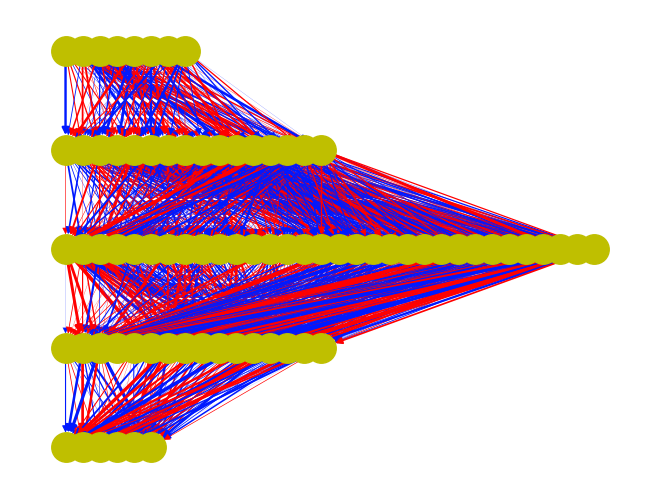

In [36]:
show_ann(mlp3)
weights3 = np.absolute(mlp3.coefs_[0])
weights3 = np.sum(weights3,axis=1)/16
weights3

In [86]:
glassSample = X_train[X_train.index==90]
predictionsFinal = mlp3.predict(glassSample)
display(predictionsFinal)

array([2], dtype=int64)

### Are there any correlations between edge weights and the descision trees?

Important features have more average weights assigned to them. These attributes are also used for splitting the data in the decision tree algorithm